## Importing dependencies

In [1]:
import pandas as pd # Data wrangling
import numpy as np # Numerical operations
from sklearn.metrics import accuracy_score,confusion_matrix #Metrics to measure model performance
from sklearn.linear_model import LogisticRegression # ML Model
from sklearn.model_selection import train_test_split # Splitting Data
import seaborn as sns # visualization library
import warnings
warnings.filterwarnings('ignore')

# Reading data
we will use pandas to read the data from the file

In [2]:
df=pd.read_csv('datasets/2_sonar_data.csv',header=None)
df.head() # printing first 5 rows

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
print(df.shape) # dataset shape
df.describe() # 5 Number summary

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


### Data distribution
Target class is slightly imbalance but ignorable

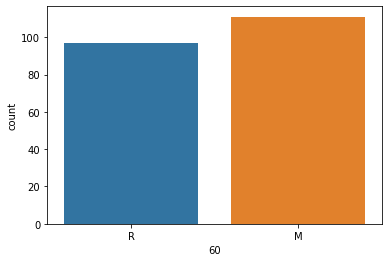

In [4]:
sns.countplot(df[60]); # distribution of data

### Splitting target and features

In [5]:
X=df.drop(60,axis=1)
y=df[60]

### SPlitting the data into train and test set

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [7]:
y_train.head()

97     M
132    M
201    M
54     R
105    M
Name: 60, dtype: object

### Model

In [8]:
lg=LogisticRegression() #model
lg.fit(X_train,y_train) #training model
y_pred=lg.predict(X_test) # making prediction

### Prediction

In [9]:
y_pred=lg.predict(X_test)

### Accuracy of model

In [10]:
ac=accuracy_score(y_pred,y_test)

### Confusion Matrix
You can read more about confusion matrix here
https://medium.com/geekculture/metrics-for-classification-confusion-matrix-43ee441d2947

In [11]:
cm=confusion_matrix(y_pred,y_test)

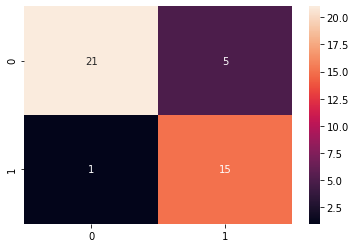

In [12]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True);

# Accuracy from confusion matrix

In [13]:
acc=(cm[0][0] +cm[1][1])/(cm[0][0] + cm[0][1] +cm[1][0] + cm[1][1])
acc

0.8571428571428571